# ObsID : 0945020137, SRCNUM : 21, Instru : EPN
Not on Simbad.

## ESASky
https://sky.esa.int/esasky/?target=52.73766666666666%20-28.63463888888889&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033057.0-283804
- RA : 03h 30m 57.047s
- DEC : -28° 38' 04.16"

In [4]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945020137_SRCNUM21_EPN_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.083e-02 +/- 1.462e-03 (36.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-14
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.622e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945020137_SRCNUM21_EPN_background_spectrum.fits
  Background Exposure Time: 1.619e+04 sec
 Using Response (RMF) File            ObsID0945020137_SRCNUM21_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020137_SRCNUM21_EPN.arf



In [4]:
n_cts = 1.083e-02*1.622e+04

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 175.6626


## Plot spectrum

In [5]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.2 12.0-**")


1 spectrum  in use
 
Spectral Data File: ObsID0945020137_SRCNUM21_EPN_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.083e-02 +/- 1.462e-03 (36.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-14
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.622e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945020137_SRCNUM21_EPN_background_spectrum.fits
  Background Exposure Time: 1.619e+04 sec
 Using Response (RMF) File            ObsID0945020137_SRCNUM21_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020137_SRCNUM21_EPN.arf

     2 channels (1-2) ignored in spectrum #     1
     1 channels (14) ignored in spectrum #     1



(-0.5, 855.5, 661.5, -0.5)

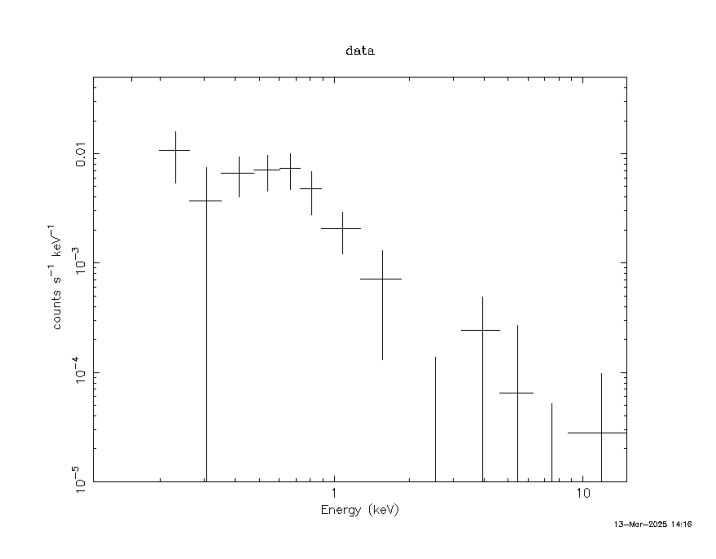

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
**tbabs :**

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              5.909747e+12     using 11 bins.

Te

(-0.5, 852.5, 645.5, -0.5)

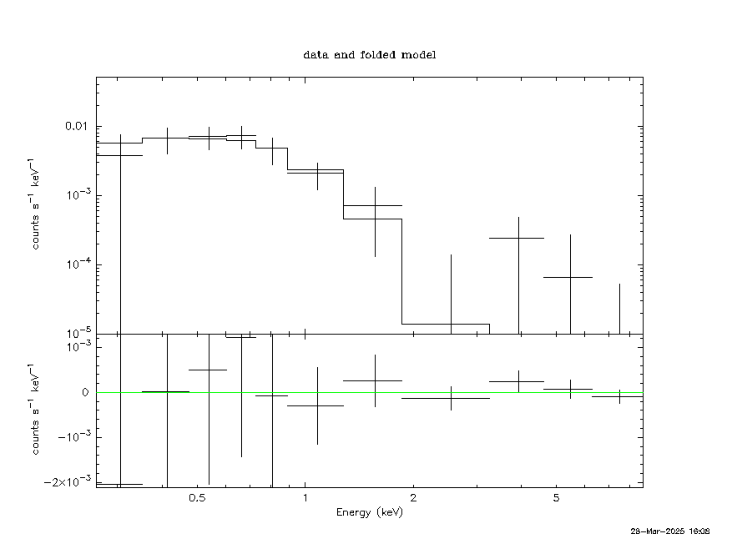

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model (Best fit)
**tbabs :**

In [9]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.387941e+11     using 11 bins.

Test statistic : Chi-Squared              2.387941e+11     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
32.2715      0.370943      0      0.341802       2.87977   2.02493e-06
25.6835      314474        0     0.0465642      0.752616   2.29556e-06
4.93507      767407       -1     0.0204343      0.863303   8.07464e-06
4

(-0.5, 846.5, 646.5, -0.5)

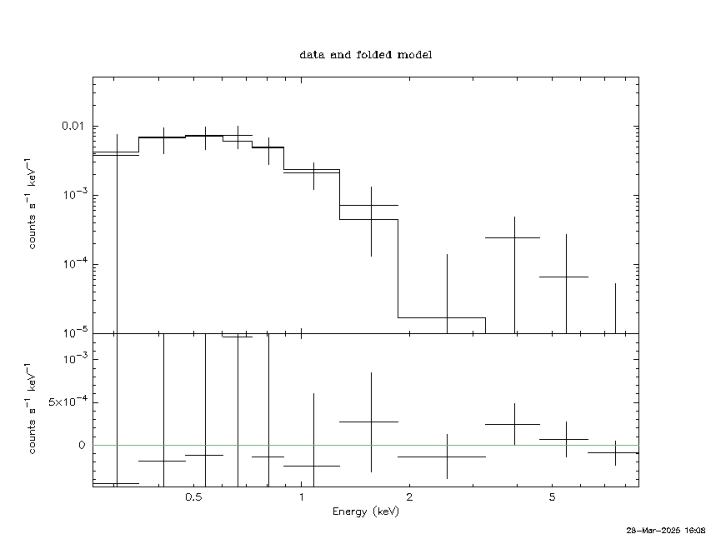

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model
**tbabs :**

In [11]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              4.906759e+10     using 11 bins.

Test statistic : Chi-Squared              4.906759e+10     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
28.891       1.94911       0      0.984683      0.885978   1

(-0.5, 851.5, 644.5, -0.5)

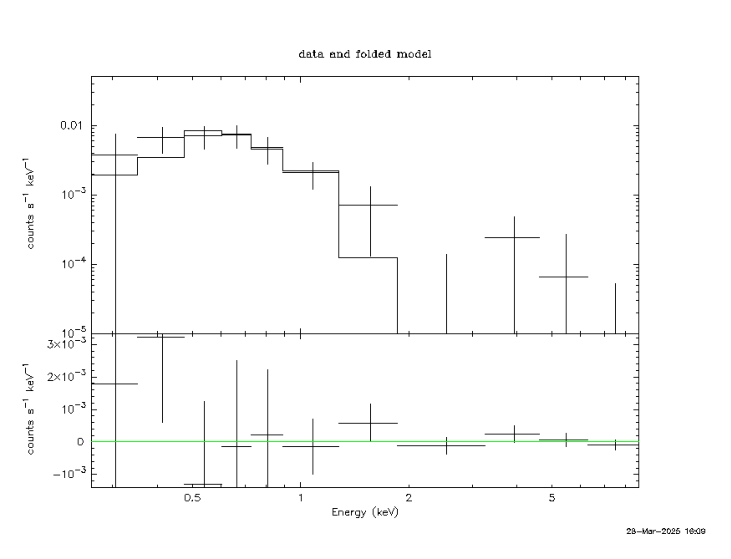

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
**tbabs :**

In [13]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.392888e+12     using 11 bins.

Test statistic : Chi-Squared              1.392888e+12     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
36.3834      0.245207     -1      0.164355      0.973527   1.52005e-07
31.1294      1.22302e+06   0     0.0377930       2.35123   4.12370e-07
22.3882      2.45052e+06   0     0.0181563       3.10039   6.93631e-07

(-0.5, 857.5, 655.5, -0.5)

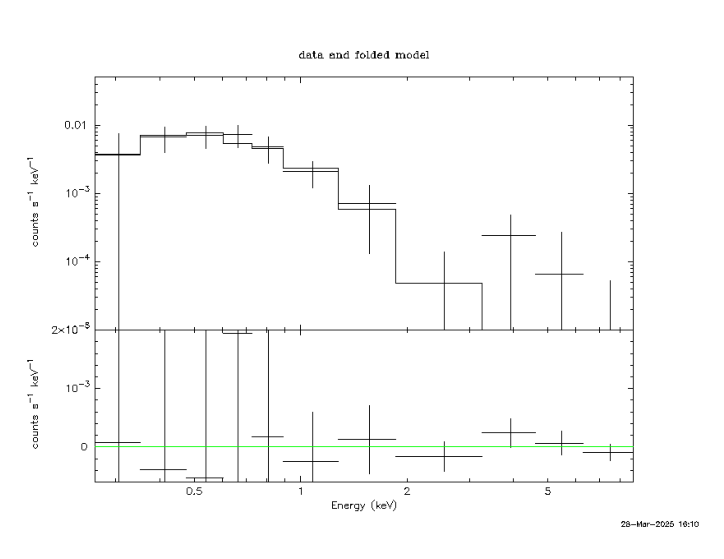

In [14]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body + Powerlaw model (Second best fit)
X-ray binaries

In [15]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.239913e+13     using 11 bins.

Test statistic : Chi-Squared              1.239913e+13     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
36.121       111420   

(-0.5, 850.5, 647.5, -0.5)

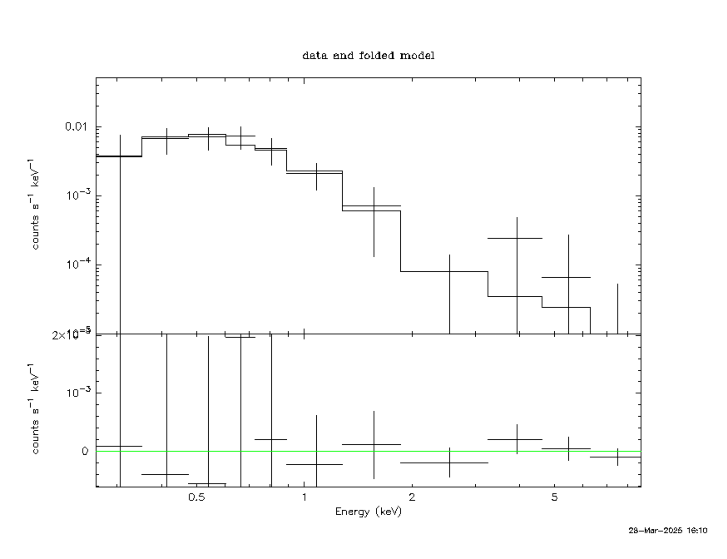

In [16]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbodypowerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

### Bremss + Powerlaw model

In [17]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.726699e+12     using 11 bins.

Test statistic : Chi-Squared              2.726699e+12     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
30.1418      31753.1 

(-0.5, 855.5, 662.5, -0.5)

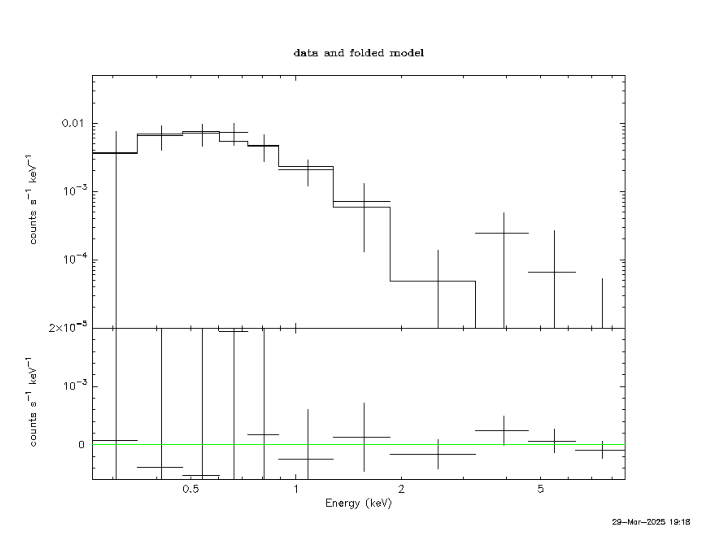

In [18]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremsspowerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

### Apec + Apec model

In [19]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apecapec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.962728e+11     using 11 bins.

Test statistic : Chi-Squared              1.962728e+11     using 11 bins.
 Null hypothesis probability

(-0.5, 852.5, 655.5, -0.5)

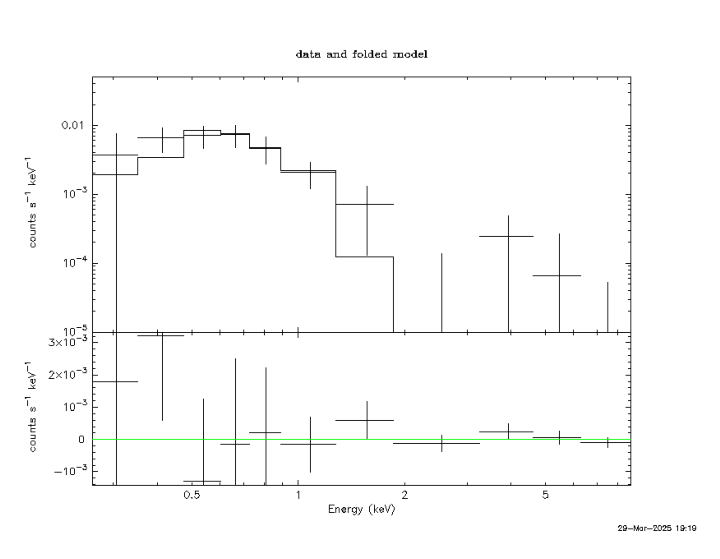

In [20]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apecapec.png")[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 52.7376939°
- Dec = -28.6344882°

52.74 -28.63

**Column density :** nH = 2*10^20 cm^-2

In [21]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss (Best fit)"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print()
print(color.BOLD+"bbody+powerlaw (Second best fit)"+color.END)
print(f"(tbabs) : {nH_bbodypowerlaw*10**22}")
print()
print(color.BOLD+"bremss+powerlaw"+color.END)
print(f"(tbabs) : {nH_bremsspowerlaw*10**22}")
print()
print(color.BOLD+"apec+apec"+color.END)
print(f"(tbabs) : {nH_apecapec*10**22}")

The different models give a column density of :

bbody
(tbabs) : 3139141.93632542

bremss (Best fit)
(tbabs) : 1.7393757792828824e+21

apec
(tbabs) : 7.206611802436419e+21

powerlaw
(tbabs) : 3.812979068542185e+21

bbody+powerlaw (Second best fit)
(tbabs) : 3.8950922920360285e+21

bremss+powerlaw
(tbabs) : 3.819387699749483e+21

apec+apec
(tbabs) : 7.221268767092631e+21


## Flux
### X-ray Flux
- X-ray Flux of the best-fitting model ``Bremsstrahlung`` with Chi-squared = 2.3001 using 11 bins: **9.0779e-15 ergs/cm^2/s**.
- X-ray Flux of the second best-fitting model ``Black body + Powerlaw`` with Chi-squared = 2.5671 using 11 bins: **1.1843e-14 ergs/cm^2/s**.

In [5]:
F_X1 = 9.0779e-15 # ergs/cm^2/s
F_X2 = 1.1843e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Bremsstrahlung : F_x-ray = {F_X1} ergs/cm^2/s")
print(f"Black body + Powerlaw : F_x-ray = {F_X2} ergs/cm^2/s")

X-ray flux : 
Bremsstrahlung : F_x-ray = 9.0779e-15 ergs/cm^2/s
Black body + Powerlaw : F_x-ray = 1.1843e-14 ergs/cm^2/s


### Optical Flux
No magnitude value from GAIA is available, so we use GAIA's limiting magnitude of G = 20.7.

In [6]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 20.7

F = F_optical(G)

print(color.BOLD+"Optical Flux (lower limit) : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical Flux (lower limit) : F_optical = 5.510478332622621e-14 ergs/cm^2/s


### X-ray Flux / Optical Flux ratio

In [7]:
print(color.BOLD+"X-ray Flux / Optical Flux ratio : "+color.END)
print(f"Bremsstrahlung : F_x-ray/F_optical = {F_X1/F}")
print(f"Black body + Powerlaw : F_x-ray/F_optical = {F_X2/F}")

X-ray Flux / Optical Flux ratio : 
Bremsstrahlung : F_x-ray/F_optical = 0.1647388747771289
Black body + Powerlaw : F_x-ray/F_optical = 0.21491782174132093


## Luminosity
No distance or parallax data is available on ESASky.

In [8]:
# For a star in the milky way : d=[1 pc - 30 kpc]
d_pc = 1 # Distance en pc
d_kpc = 30 # Distance en kpc

d1_cm = d_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_pc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L11 = 4*np.pi*F_X1*(d1_cm)**2 # erg/s
L21 = 4*np.pi*F_X1*(d2_cm)**2 # erg/s
L12 = 4*np.pi*F_X2*(d1_cm)**2 # erg/s
L22 = 4*np.pi*F_X2*(d2_cm)**2 # erg/s

print(color.BOLD+"Luminosity of a galacitc source with d = [1 pc - 30 kpc] :"+color.END)
print(f"Bremss : L_x-ray = [{L11}, {L21}] erg/s")
print(f"Black body + Powerlaw : L_x-ray = [{L12}, {L22}] erg/s")
print()

# For a galaxy : d=[1 Mpc - 10 Gpc]
d_Mpc = 1 # Distance en Mpc
d_Gpc = 10 # Distance en Gpc

d1_cm = d_Mpc*3.0857*10**24 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_Gpc*3.0857*10**27 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L11 = 4*np.pi*F_X1*(d1_cm)**2 # erg/s
L21 = 4*np.pi*F_X1*(d2_cm)**2 # erg/s
L12 = 4*np.pi*F_X2*(d1_cm)**2 # erg/s
L22 = 4*np.pi*F_X2*(d2_cm)**2 # erg/s

print(color.BOLD+"Luminosity of an extragalactic source with d = [1 Mpc - 10 Gpc] :"+color.END)
print(f"Bremss : L_x-ray = [{L11}, {L21}] erg/s")
print(f"Black body + Powerlaw : L_x-ray = [{L12}, {L22}] erg/s")

Luminosity of a galacitc source with d = [1 pc - 30 kpc] :
Bremss : L_x-ray = [1.0861821448531882e+24, 1.0861821448531881e+30] erg/s
Black body + Powerlaw : L_x-ray = [1.4170298352588494e+24, 1.4170298352588492e+30] erg/s

Luminosity of an extragalactic source with d = [1 Mpc - 10 Gpc] :
Bremss : L_x-ray = [1.0861821448531884e+36, 1.0861821448531882e+44] erg/s
Black body + Powerlaw : L_x-ray = [1.4170298352588492e+36, 1.4170298352588494e+44] erg/s


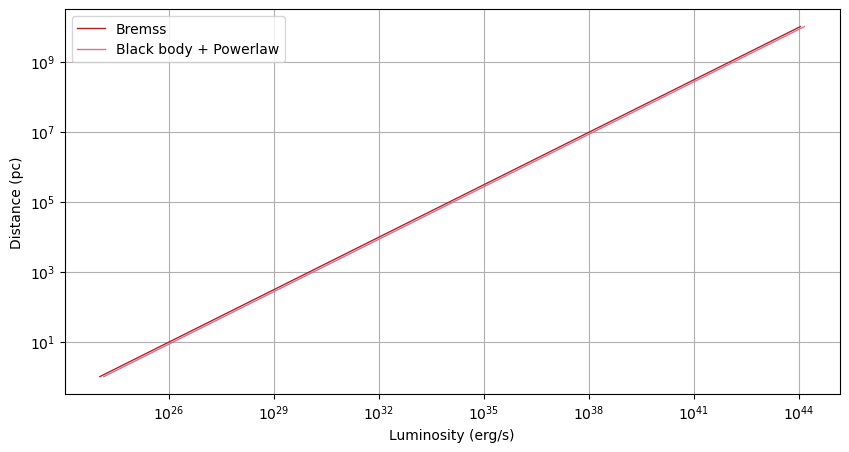

In [10]:
D_pc = np.arange(1, 10**10, 1000)

d_cm = D_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L_bremss = 4*np.pi*F_X1*(d_cm)**2 # erg/s
L_bbp = 4*np.pi*F_X2*(d_cm)**2 # erg/s

plt.figure(figsize=[10,5])
plt.plot(L_bremss,D_pc, lw=1, color='firebrick', label="Bremss")
plt.plot(L_bbp,D_pc, lw=1, color='palevioletred', label="Black body + Powerlaw")
plt.xlabel("Luminosity (erg/s)")
plt.ylabel("Distance (pc)")
plt.legend(loc='best')
plt.xscale("log")
plt.yscale("log")
plt.grid()